In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

## Load Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/BrianThomasRoss/Brian_Ross_DataStorytellingProject/master/compiled_data/congress_net_worth.csv?token=ALRVPBQYWLC7JULPFTHVX6S5W4EYC')
df.drop(columns='Unnamed: 0', inplace=True)
print(df.shape)
df.head()

(997, 40)


,chamber,member_name,party,net_worth_2010,net_worth_2011,2011_net_increase,net_worth_2012,2012_net_increase,net_worth_2013,2013_net_increase,net_worth_2014,2014_net_increase,net_worth_2015,2015_net_increase,net_worth_2016,2016_net_increase,defense_friendliness_rating_2010,defense_friendliness_rating_2012,defense_friendliness_rating_2014,defense_friendliness_rating_2016,energy_friendliness_rating_2010,energy_friendliness_rating_2012,energy_friendliness_rating_2014,energy_friendliness_rating_2016,tech_comm_friendliness_rating_2010,tech_comm_friendliness_rating_2012,tech_comm_friendliness_rating_2014,tech_comm_friendliness_rating_2016,health_friendliness_rating_2010,health_friendliness_rating_2012,health_friendliness_rating_2014,health_friendliness_rating_2016,finance_friendliness_rating_2010,finance_friendliness_rating_2012,finance_friendliness_rating_2014,finance_friendliness_rating_2016,2010_friendliness_avg,2012_friendliness_avg,2014_friendliness_avg,2016_friendliness_avg
0,House,"Issa, Darrell",R,448125017.0,480325019.0,7.185495,464115018.0,-3.374798,448425019.0,-3.380627,436500015.0,-2.659308,330050015.0,-24.38717,323782513.0,-1.898955,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,4.0,3.0,3.0,4.0,4.0,4.0,3.8,4.4,4.2,4.0
1,House,"McCaul, Michael",R,380411527.0,500624461.0,31.600760,143153910.0,-71.404931,162882467.0,13.781361,160340931.0,-1.560350,4150505.0,-97.41145,0.0,-100.000000,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,2.0,2.0,4.0,4.0,4.0,4.0,4.2,4.0,4.2,4.2
2,House,"Harman, Jane",D,326844751.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.6,NaN,NaN,NaN
3,Senate,"Kerry, John",D,231722794.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,1.0,NaN,3.0,1.0,1.0,NaN,5.0,4.0,1.0,NaN,4.0,2.0,1.0,NaN,4.0,2.0,1.0,NaN,3.8,2.0,1.0,NaN
4,Senate,"Warner, Mark",D,192730605.0,228129609.0,18.367090,257481658.0,12.866392,254176651.0,-1.283589,242889630.0,-4.440621,238157630.0,-1.94821,245680083.0,3.158603,4.0,4.0,5.0,4.0,3.0,4.0,5.0,3.0,5.0,5.0,5.0,4.0,3.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,4.4,5.0,3.8


In [3]:
net_increases_df = df[['member_name',
                       'party',
                       '2011_net_increase',
                       '2012_net_increase',
                       '2013_net_increase',
                       '2014_net_increase',
                       '2015_net_increase',
                       '2016_net_increase',
                       '2010_friendliness_avg',
                       '2012_friendliness_avg',
                       '2014_friendliness_avg',
                       '2016_friendliness_avg']]
net_increases_df.head()

,member_name,party,2011_net_increase,2012_net_increase,2013_net_increase,2014_net_increase,2015_net_increase,2016_net_increase,2010_friendliness_avg,2012_friendliness_avg,2014_friendliness_avg,2016_friendliness_avg
0,"Issa, Darrell",R,7.185495,-3.374798,-3.380627,-2.659308,-24.38717,-1.898955,3.8,4.4,4.2,4.0
1,"McCaul, Michael",R,31.600760,-71.404931,13.781361,-1.560350,-97.41145,-100.000000,4.2,4.0,4.2,4.2
2,"Harman, Jane",D,NaN,NaN,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN
3,"Kerry, John",D,NaN,NaN,NaN,NaN,NaN,NaN,3.8,2.0,1.0,NaN
4,"Warner, Mark",D,18.367090,12.866392,-1.283589,-4.440621,-1.94821,3.158603,4.0,4.4,5.0,3.8


In [4]:
print("2011: " , net_increases_df['2011_net_increase'].mean())
print("2012: " , net_increases_df['2012_net_increase'].mean())
print("2013: " , net_increases_df['2013_net_increase'].mean())
print("2014: " , net_increases_df['2014_net_increase'].mean())
print("2015: " , net_increases_df['2015_net_increase'].mean())
print("2016: " , net_increases_df['2016_net_increase'].mean())

2011:  23.743522953382428
2012:  66.16950839550744
2013:  16.331079048263035
2014:  56.93977336829777
2015:  -602.9415565634416
2016:  13.199743148383089


In [5]:
net_increases_df['2016_net_increase'].describe()

count      520.000000
mean        13.199743
std        774.073430
min      -1249.711605
25%       -100.000000
50%        -10.869731
75%          3.098573
max      11847.590361
Name: 2016_net_increase, dtype: float64

## Cleaning

In [0]:
# Removing extreme outliers
net_increases_df = net_increases_df.loc[net_increases_df['2015_net_increase'] != net_increases_df['2015_net_increase'].min()]
net_increases_df = net_increases_df.loc[net_increases_df['2015_net_increase'] != net_increases_df['2015_net_increase'].min()]
net_increases_df = net_increases_df.loc[net_increases_df['2015_net_increase'] != net_increases_df['2015_net_increase'].min()]
net_increases_df = net_increases_df.loc[net_increases_df['2015_net_increase'] != net_increases_df['2015_net_increase'].min()]
net_increases_df = net_increases_df.loc[net_increases_df['2012_net_increase'] != net_increases_df['2012_net_increase'].max()]
net_increases_df = net_increases_df.loc[net_increases_df['2014_net_increase'] != net_increases_df['2014_net_increase'].max()]

In [0]:
avg_gains = [net_increases_df['2011_net_increase'].mean(),
           net_increases_df['2012_net_increase'].mean(),
           net_increases_df['2013_net_increase'].mean(),
           net_increases_df['2014_net_increase'].mean(),
           net_increases_df['2015_net_increase'].mean(),
           net_increases_df['2016_net_increase'].mean()]
           
bar_labels = ['2011', '2012', '2013', '2014',
              '2015', '2016']

x_pos = list(range(len(bar_labels)))

## Visualization #1

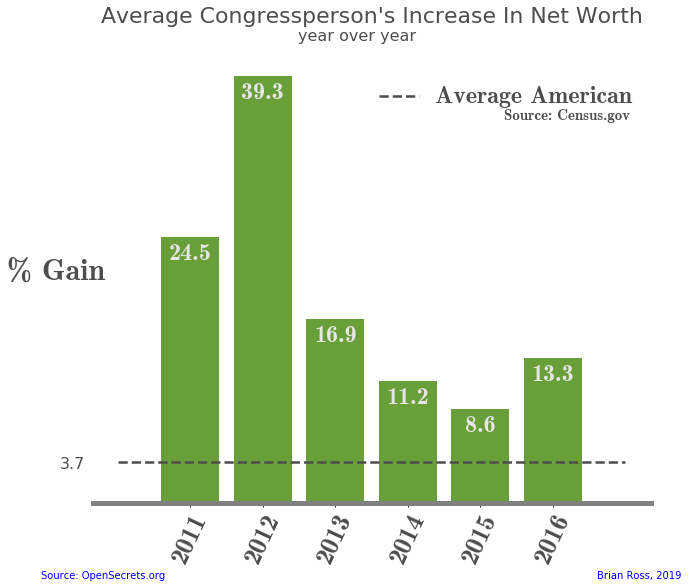

In [66]:
fig, ax = plt.subplots(figsize=(10,8))

# Font
csfont = {'fontname':'cmb10'}

# Background colors
fig.patch.set(facecolor="none")
ax.set(facecolor="none")

# Title
ax.set_title("Average Congressperson's Increase In Net Worth",
          fontsize=22,
          pad=45,
          ha='center',
          color='.3')

# Subtitle
ax.text(s="year over year",
        fontsize=16,
        x=2.3,
        y=42.5,
        color='.3',
        ha='center')

# Bars
ax.bar(x_pos,
        avg_gains, 
        align='center',
        color='#689F38')

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        y_pos = y_value - 3
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_pos),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=24,
            color='.9',
            **csfont)
                              
add_value_labels(ax)

############ X Axis ############

plt.xticks(x_pos, bar_labels,   
           rotation='65',
           fontsize=26,
           fontweight='bold',
           color='.3',
           **csfont)

############ Y Axis ############

plt.ylabel("% Gain", 
           fontsize=30,
           color='.3',
           rotation='horizontal',
           **csfont)

ax.set_yticks([3.7])

ax.tick_params(axis="y", 
               labelsize=16,
               color='none',
               labelcolor='.3')

plt.ylim(0, 40)

############ Hline ############

plt.hlines(y=3.7,
           xmin=-1,
           xmax=6, 
           linestyle="--",
           linewidth=2.5,
           color='.3',
           label="Average American")

############ Legend ############

ax.legend('hline')

legend = plt.legend(facecolor='none',  
                    prop={'size':20},
                    framealpha=0.0)

plt.setp(legend.get_texts(),    
         fontsize=24, 
         color='.3',
         **csfont)

ax.text(s="Source: Census.gov",
        fontsize=15,
        x=5.2,
        y=35.2,
        color='.3',
        ha='center',
        **csfont)


ax.grid(False) # Hide Grid

############ Spine Settings ############

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('.5')
ax.spines['bottom'].set_linewidth('5')                                                                                                                                                                                                                                                                       

############ Signature ############

ax.text(s="Brian Ross, 2019",
        fontsize=10,
        x=6.2,
        y=-7,
        color='b',
        ha='center',)

ax.text(s="Source: OpenSecrets.org",
        fontsize=10,
        x=-1.2,
        y=-7,
        color='b',
        ha='center',)

plt.show();


## Visualization # 2

In [11]:
net_increases_df.head()

,member_name,party,2011_net_increase,2012_net_increase,2013_net_increase,2014_net_increase,2015_net_increase,2016_net_increase,2010_friendliness_avg,2012_friendliness_avg,2014_friendliness_avg,2016_friendliness_avg
0,"Issa, Darrell",R,7.185495,-3.374798,-3.380627,-2.659308,-24.38717,-1.898955,3.8,4.4,4.2,4.0
1,"McCaul, Michael",R,31.600760,-71.404931,13.781361,-1.560350,-97.41145,-100.000000,4.2,4.0,4.2,4.2
2,"Harman, Jane",D,NaN,NaN,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN
3,"Kerry, John",D,NaN,NaN,NaN,NaN,NaN,NaN,3.8,2.0,1.0,NaN
4,"Warner, Mark",D,18.367090,12.866392,-1.283589,-4.440621,-1.94821,3.158603,4.0,4.4,5.0,3.8


In [0]:
republican_avg_gains_df = net_increases_df.loc[net_increases_df['party'] == 'R']
democrat_avg_gains_df = net_increases_df.loc[net_increases_df['party'] == 'D']

In [13]:
print("2011: " , republican_avg_gains_df['2011_net_increase'].mean())
print("2012: " , republican_avg_gains_df['2012_net_increase'].mean())
print("2013: " , republican_avg_gains_df['2013_net_increase'].mean())
print("2014: " , republican_avg_gains_df['2014_net_increase'].mean())
print("2015: " , republican_avg_gains_df['2015_net_increase'].mean())
print("2016: " , republican_avg_gains_df['2016_net_increase'].mean())

2011:  17.868621051312093
2012:  45.67974329521616
2013:  19.158212894849285
2014:  18.155987693121084
2015:  19.77770819372877
2016:  -33.43854892228578


In [0]:
repub_avg_gains_list = [republican_avg_gains_df['2011_net_increase'].mean(),
                        republican_avg_gains_df['2012_net_increase'].mean(),
                        republican_avg_gains_df['2013_net_increase'].mean(),
                        republican_avg_gains_df['2014_net_increase'].mean(),
                        republican_avg_gains_df['2015_net_increase'].mean(),
                        republican_avg_gains_df['2016_net_increase'].mean()]

In [15]:
print("2011: " , democrat_avg_gains_df['2011_net_increase'].mean())
print("2012: " , democrat_avg_gains_df['2012_net_increase'].mean())
print("2013: " , democrat_avg_gains_df['2013_net_increase'].mean())
print("2014: " , democrat_avg_gains_df['2014_net_increase'].mean())
print("2015: " , democrat_avg_gains_df['2015_net_increase'].mean())
print("2016: " , democrat_avg_gains_df['2016_net_increase'].mean())

2011:  33.210126659135106
2012:  33.56556144279618
2013:  16.41743371159219
2014:  7.522684102517202
2015:  -0.8771593477810333
2016:  76.64304582867958


In [0]:
dem_avg_gains_list = [democrat_avg_gains_df['2011_net_increase'].mean(),
                      democrat_avg_gains_df['2012_net_increase'].mean(),
                      democrat_avg_gains_df['2013_net_increase'].mean(),
                      democrat_avg_gains_df['2014_net_increase'].mean(),
                      democrat_avg_gains_df['2015_net_increase'].mean(),
                      democrat_avg_gains_df['2016_net_increase'].mean()]

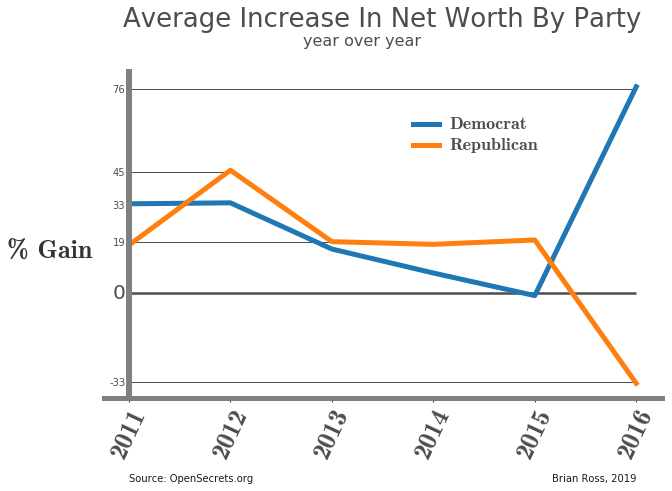

In [49]:

fig, ax = plt.subplots(figsize=(10,6))

# Title
ax.set_title("Average Increase In Net Worth By Party",
          fontsize=26,
          pad=45,
          ha='center',
          color='.3')
# Subtitle
ax.text(s="year over year",
        fontsize=16,
        x=2.3,
        y=92,
        color='.3',
        ha='center')

# Background colors
fig.patch.set(facecolor="none")
ax.set(facecolor="none")

##### Lines #####
plt.plot(x_pos, 
         dem_avg_gains_list,
         linewidth=5,
         label="Democrat")

plt.plot(x_pos, #Republican
         repub_avg_gains_list,
         linewidth=5,
         label="Republican")


##### Legend #####
leg = plt.legend(bbox_to_anchor=(0.8,.9),
                 facecolor='none',  
                    prop={'size':13},
                    framealpha=0.0)

plt.setp(leg.get_texts(),    
         fontsize=18, 
         color='.3',
         **csfont)


##### X Axis #####
plt.xticks(x_pos, bar_labels,   
           rotation='65',
           fontsize=26,
           fontweight='bold',
           color='.3',
           **csfont)


##### Y Axis #####
y_ticks_list = [-33, 33, 19, 45, 76]
y_ticks_labels = ['-33', '33', '19', '45', '76']

ax.text(s="0",
        fontsize=20,
        x=-.1,
        y=-2,
        color='.3',
        ha='center',)
ax.text(s='% Gain',
        fontsize=26,
        x=-1.2,
        y=13,
        color='.2',
        **csfont)

plt.yticks(y_ticks_list,
           y_ticks_labels,   
           rotation='horizontal',
           fontsize=18,
           fontweight='bold',
           color='.3')

ax.tick_params(axis='y',
               direction='out',
               size=0,
               length=6, 
               width=2,
               colors='.3')

##### H Lines #####
plt.hlines(y=0,    # Y = 0
           xmin=0,
           xmax=5, 
           linestyle="-",
           linewidth=2.5,
           color='.3',)
plt.hlines(y=45,
           xmin=0,
           xmax=1, 
           linestyle="-",
           linewidth=1,
           color='.3')
plt.hlines(y=19,
           xmin=0,
           xmax=2, 
           linestyle="-",
           linewidth=1,
           color='.3')

plt.hlines(y=-33,
           xmin=0,
           xmax=5, 
           linestyle="-",
           linewidth=1,
           color='.3')
plt.hlines(y=76,
           xmin=0,
           xmax=5, 
           linestyle="-",
           linewidth=1,
           color='.3')

##### Signature #####

ax.text(s="Brian Ross, 2019",
        fontsize=10,
        x=5,
        y=-70,
        color='.1',
        ha='right',)

ax.text(s="Source: OpenSecrets.org",
        fontsize=10,
        x=0,
        y=-70,
        color='.1',
        ha='left',)

ax.grid(False)

##### Legend #####
leg = plt.legend(bbox_to_anchor=(0.8,.9),
                 facecolor='none',  
                    prop={'size':13},
                    framealpha=0.0)

plt.setp(leg.get_texts(),    
         fontsize=18, 
         color='.3',
         **csfont)


############ Spine Settings ############

ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('.5')
ax.spines['left'].set_linewidth('6')
ax.spines['left'].set_position(('axes', .0451))
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('.5')
ax.spines['bottom'].set_linewidth('5')

plt.show();

## Visualization #3

In [18]:
net_increases_df.head()

,member_name,party,2011_net_increase,2012_net_increase,2013_net_increase,2014_net_increase,2015_net_increase,2016_net_increase,2010_friendliness_avg,2012_friendliness_avg,2014_friendliness_avg,2016_friendliness_avg
0,"Issa, Darrell",R,7.185495,-3.374798,-3.380627,-2.659308,-24.38717,-1.898955,3.8,4.4,4.2,4.0
1,"McCaul, Michael",R,31.600760,-71.404931,13.781361,-1.560350,-97.41145,-100.000000,4.2,4.0,4.2,4.2
2,"Harman, Jane",D,NaN,NaN,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN
3,"Kerry, John",D,NaN,NaN,NaN,NaN,NaN,NaN,3.8,2.0,1.0,NaN
4,"Warner, Mark",D,18.367090,12.866392,-1.283589,-4.440621,-1.94821,3.158603,4.0,4.4,5.0,3.8


In [0]:
net_increases_df['ovr_friendliness_rating'] = (net_increases_df['2010_friendliness_avg'] +
                                               net_increases_df['2012_friendliness_avg'] +
                                               net_increases_df['2014_friendliness_avg'] + 
                                               net_increases_df['2016_friendliness_avg']) / 4

In [20]:
net_increases_df.head()

,member_name,party,2011_net_increase,2012_net_increase,2013_net_increase,2014_net_increase,2015_net_increase,2016_net_increase,2010_friendliness_avg,2012_friendliness_avg,2014_friendliness_avg,2016_friendliness_avg,ovr_friendliness_rating
0,"Issa, Darrell",R,7.185495,-3.374798,-3.380627,-2.659308,-24.38717,-1.898955,3.8,4.4,4.2,4.0,4.10
1,"McCaul, Michael",R,31.600760,-71.404931,13.781361,-1.560350,-97.41145,-100.000000,4.2,4.0,4.2,4.2,4.15
2,"Harman, Jane",D,NaN,NaN,NaN,NaN,NaN,NaN,3.6,NaN,NaN,NaN,NaN
3,"Kerry, John",D,NaN,NaN,NaN,NaN,NaN,NaN,3.8,2.0,1.0,NaN,NaN
4,"Warner, Mark",D,18.367090,12.866392,-1.283589,-4.440621,-1.94821,3.158603,4.0,4.4,5.0,3.8,4.30


In [0]:
f1_2010 = net_increases_df[net_increases_df['2010_friendliness_avg'] < 2]
f2_2010 = (net_increases_df[(net_increases_df['2010_friendliness_avg'] > 2) & (net_increases_df['2010_friendliness_avg'] < 3)]) 
f3_2010 = (net_increases_df[(net_increases_df['2010_friendliness_avg'] > 3) & (net_increases_df['2010_friendliness_avg'] < 4)]) 
f4_2010 = (net_increases_df[(net_increases_df['2010_friendliness_avg'] > 4) & (net_increases_df['2010_friendliness_avg'] < 5)]) 

In [0]:
f1_2012 = net_increases_df[net_increases_df['2012_friendliness_avg'] < 2]
f2_2012 = (net_increases_df[(net_increases_df['2012_friendliness_avg'] > 2) & (net_increases_df['2012_friendliness_avg'] < 3)]) 
f3_2012 = (net_increases_df[(net_increases_df['2012_friendliness_avg'] > 3) & (net_increases_df['2012_friendliness_avg'] < 4)]) 
f4_2012 = (net_increases_df[(net_increases_df['2012_friendliness_avg'] > 4) & (net_increases_df['2012_friendliness_avg'] < 5)]) 

In [0]:
f1_2014 = net_increases_df[net_increases_df['2014_friendliness_avg'] < 2]
f2_2014 = (net_increases_df[(net_increases_df['2014_friendliness_avg'] > 2) & (net_increases_df['2014_friendliness_avg'] < 3)]) 
f3_2014 = (net_increases_df[(net_increases_df['2014_friendliness_avg'] > 3) & (net_increases_df['2014_friendliness_avg'] < 4)]) 
f4_2014 = (net_increases_df[(net_increases_df['2014_friendliness_avg'] > 4) & (net_increases_df['2014_friendliness_avg'] < 5)]) 

In [0]:
f1_2016 = net_increases_df[net_increases_df['2016_friendliness_avg'] < 2]
f2_2016 = (net_increases_df[(net_increases_df['2016_friendliness_avg'] > 2) & (net_increases_df['2016_friendliness_avg'] < 3)]) 
f3_2016 = (net_increases_df[(net_increases_df['2016_friendliness_avg'] > 3) & (net_increases_df['2016_friendliness_avg'] < 4)]) 
f4_2016 = (net_increases_df[(net_increases_df['2016_friendliness_avg'] > 4) & (net_increases_df['2016_friendliness_avg'] < 5)]) 

In [25]:
f1_2010.describe()

,2011_net_increase,2012_net_increase,2013_net_increase,2014_net_increase,2015_net_increase,2016_net_increase,2010_friendliness_avg,2012_friendliness_avg,2014_friendliness_avg,2016_friendliness_avg,ovr_friendliness_rating
count,70.000000,74.000000,64.000000,50.000000,50.000000,44.000000,107.000000,81.000000,72.000000,59.000000,59.000000
mean,28.733718,22.604391,20.298036,-26.652984,-4.860646,-57.863476,1.445483,1.957407,2.159722,1.914407,1.893150
std,145.148138,160.457691,128.871934,146.368956,123.913379,158.068637,0.285953,0.927197,1.255288,0.897701,0.521376
min,-100.000000,-137.385141,-409.428094,-698.805054,-775.021324,-967.754423,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-5.503506,-7.337593,-10.503297,-15.042142,-4.849765,-80.247401,1.200000,1.250000,1.200000,1.200000,1.468750
50%,0.000000,0.000000,1.410688,0.000000,0.000000,-13.402229,1.500000,1.750000,1.800000,1.800000,1.950000
75%,16.404035,10.362496,18.782852,10.292575,12.367762,0.000000,1.750000,2.250000,2.600000,2.325000,2.300000
max,1047.664388,1301.975590,751.192224,148.376118,288.585977,56.387101,1.800000,5.000000,5.000000,5.000000,2.800000


In [26]:
f1_means_list = [f1_2010['2011_net_increase'].mean(),
                 f1_2012['2012_net_increase'].mean(),
                 f1_2012['2013_net_increase'].mean(),
                 f1_2014['2014_net_increase'].mean(),
                 f1_2014['2015_net_increase'].mean(),
                 f1_2016['2016_net_increase'].mean()]
f1_means_list

[28.733717969899388,
 11.334809369747527,
 41.727573282675024,
 21.734513462915587,
 -34.74172727230514,
 -43.75131626794218]

In [27]:
f2_means_list = [f2_2010['2011_net_increase'].mean(),
                 f2_2012['2012_net_increase'].mean(),
                 f2_2012['2013_net_increase'].mean(),
                 f2_2014['2014_net_increase'].mean(),
                 f2_2014['2015_net_increase'].mean(),
                 f2_2016['2016_net_increase'].mean()]
f2_means_list

[41.20452313091424,
 40.91652357978856,
 19.37173216464232,
 11.227347827638726,
 1.43353375727707,
 -50.01657276679672]

In [28]:
f3_means_list = [f3_2010['2011_net_increase'].mean(),
                 f3_2012['2012_net_increase'].mean(),
                 f3_2012['2013_net_increase'].mean(),
                 f3_2014['2014_net_increase'].mean(),
                 f3_2014['2015_net_increase'].mean(),
                 f3_2016['2016_net_increase'].mean()]

f3_means_list

[-0.1871179526497703,
 55.23187221877081,
 4.921480751840921,
 -7.135341006113782,
 22.84089539444704,
 0.5777246568390035]

In [29]:
f4_means_list = [f4_2010['2011_net_increase'].mean(),
                 f4_2012['2012_net_increase'].mean(),
                 f4_2012['2013_net_increase'].mean(),
                 f4_2014['2014_net_increase'].mean(),
                 f4_2014['2015_net_increase'].mean(),
                 f4_2016['2016_net_increase'].mean()]

f4_means_list

[36.957688469530794,
 16.827339643493655,
 29.453919166389877,
 24.684392636438602,
 36.73698625341209,
 322.25244568772547]

In [0]:
barWidth = 0.25
r1 = np.arange(len(f1_means_list))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

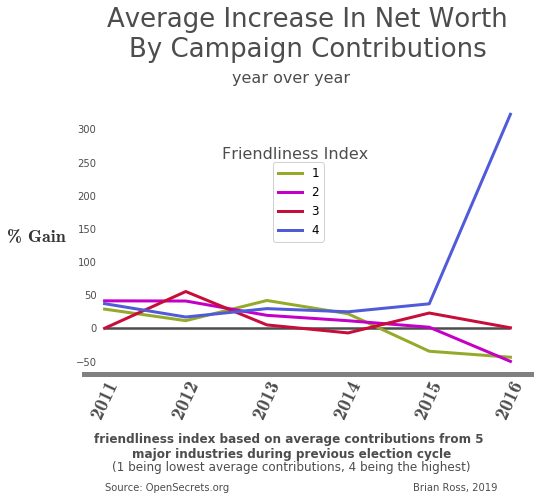

In [56]:
fig, ax = plt.subplots(figsize = (8,5))

# Background colors
fig.patch.set(facecolor="none")
ax.set(facecolor="none")

##### Title #####
plt.title("Average Increase In Net Worth\nBy Campaign Contributions",
          fontsize=26,
          pad=45,
          ha='center',
          color='.3')

          # Subtitle
ax.text(s="year over year",
        fontsize=16,
        x=2.3,
        y=370,
        color='.3',
        ha='center')

##### Lines #####

plt.plot(x_pos, 
         f1_means_list,
         linewidth=3,
         color='#94aa2a',
         label="1")

plt.plot(x_pos, 
         f2_means_list,
         linewidth=3,
         color='#c400c6',
         label="2")

plt.plot(x_pos, 
         f3_means_list,
         linewidth=3,
         color='#c70d3a',
         label="3")

plt.plot(x_pos, 
         f4_means_list,
         linewidth=3,
         color='#505bda',
         label="4")

##### Legend #####
plt.legend(bbox_to_anchor=(0.55,.8),
           facecolor='none',
           prop={'size':12},
           framealpha=0.9)

plt.setp(leg.get_texts(),    
         fontsize=12, 
         color='.3',
         **csfont)

ax.text(s="Friendliness Index",
        fontsize=16,
        x=3.25,
        y=255,
        color='.3',
        ha='right',)

##### H Lines #####
plt.hlines(y=0,    # Y = 0
           xmin=0,
           xmax=5, 
           linestyle="-",
           linewidth=2.5,
           color='.3',)

##### X Axis #####
plt.xticks(x_pos, bar_labels,   
           rotation='65',
           fontsize=20,
           fontweight='bold',
           color='.3',
           **csfont)
ax.tick_params(axis='x',
               size=0)

##### Y Axis #####
plt.yticks(  
           rotation='horizontal',
           fontsize=18,
           fontweight='bold',
           color='.3')

ax.text(s='% Gain',
        x=-1.2,
        y=130,
        fontsize=18,
        color='.2',
        **csfont)

ax.tick_params(axis='y',
               direction='out',
               size=0,
               length=6, 
               width=2,
               colors='.3')




##### Spine Settings #####
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('axes', .0351))
ax.spines['left'].set_color('.5')
ax.spines['left'].set_linewidth('0')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('.5')
ax.spines['bottom'].set_linewidth('5')

##### Signature #####
ax.text(s="friendliness index based on average contributions from 5 \nmajor industries during previous election cycle",
        fontsize=12,
        fontweight='bold',
        x=2.3,
        y=-195,
        color='.3',
        ha='center')
ax.text(s="(1 being lowest average contributions, 4 being the highest)",
        fontsize=12,
        x=2.3,
        y=-215,
        color='.3',
        ha='center')

ax.text(s="Brian Ross, 2019    ",
        fontsize=10,
        x=5,
        y=-245,
        color='.3',
        ha='right',)

ax.text(s="Source: OpenSecrets.org",
        fontsize=10,
        x=0,
        y=-245,
        color='.3',
        ha='left',)


plt.show();

## Visualization #5

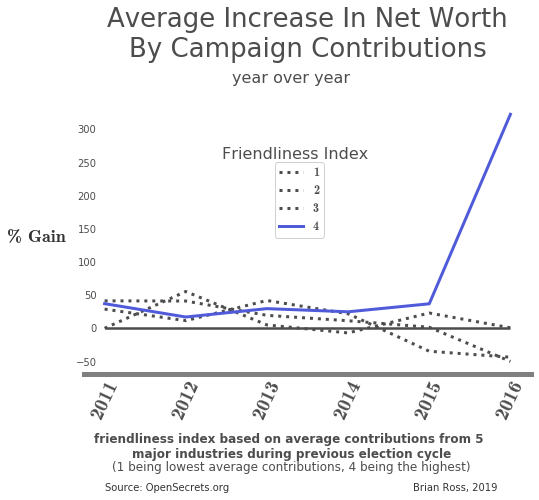

In [62]:
fig, ax = plt.subplots(figsize = (8,5))

# Background colors
fig.patch.set(facecolor="none")
ax.set(facecolor="none")

##### Title #####
plt.title("Average Increase In Net Worth\nBy Campaign Contributions",
          fontsize=26,
          pad=45,
          ha='center',
          color='.3')

          # Subtitle
ax.text(s="year over year",
        fontsize=16,
        x=2.3,
        y=370,
        color='.3',
        ha='center')
ax.text(s="friendliness index based on average contributions from 5 \nmajor industries during previous election cycle",
        fontsize=12,
        fontweight='bold',
        x=2.3,
        y=-195,
        color='.3',
        ha='center')
ax.text(s="(1 being lowest average contributions, 4 being the highest)",
        fontsize=12,
        x=2.3,
        y=-215,
        color='.3',
        ha='center')

##### Lines #####

plt.plot(x_pos, 
         f1_means_list,
         linewidth=3,
         linestyle=':',
         color='.3',
         label="1")

plt.plot(x_pos, 
         f2_means_list,
         linewidth=3,
         linestyle=':',
         color='.3',
         label="2")

plt.plot(x_pos, 
         f3_means_list,
         linewidth=3,
         linestyle=':',
         color='.3',
         label="3")

plt.plot(x_pos, 
         f4_means_list,
         linewidth=3,
         color='#505bda',
         label="4")

##### Legend #####
leg = plt.legend(bbox_to_anchor=(0.55,.8),
                 facecolor='none',  
                    prop={'size':12},
                    framealpha=0.9)

plt.setp(leg.get_texts(),    
         fontsize=12, 
         color='.3',
         **csfont)

ax.text(s="Friendliness Index",
        fontsize=16,
        x=3.25,
        y=255,
        color='.3',
        ha='right',)

##### H Lines #####
plt.hlines(y=0,    # Y = 0
           xmin=0,
           xmax=5, 
           linestyle="-",
           linewidth=2.5,
           color='.3',)

##### X Axis #####
plt.xticks(x_pos, bar_labels,   
           rotation='65',
           fontsize=20,
           fontweight='bold',
           color='.3',
           **csfont)
ax.tick_params(axis='x',
               size=0)

##### Y Axis #####
plt.yticks(  
           rotation='horizontal',
           fontsize=18,
           fontweight='bold',
           color='.3')

ax.tick_params(axis='y',
               direction='out',
               size=0,
               length=6, 
               width=2,
               colors='.3')

ax.text(s='% Gain',
        x=-1.2,
        y=130,
        fontsize=18,
        color='.2',
        **csfont)




##### Spine Settings #####
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('axes', .0351))
ax.spines['left'].set_color('.5')
ax.spines['left'].set_linewidth('0')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('.5')
ax.spines['bottom'].set_linewidth('5')

##### Signature #####

ax.text(s="Brian Ross, 2019    ",
        fontsize=10,
        x=5,
        y=-245,
        color='.2',
        ha='right',)

ax.text(s="Source: OpenSecrets.org",
        fontsize=10,
        x=0,
        y=-245,
        color='.2',
        ha='left',)


plt.show();

In [33]:
print(np.mean(f1_means_list))
print(np.mean(f2_means_list))
print(np.mean(f3_means_list))
print(np.mean(f4_means_list))

4.172928424165035
10.689514615577366
12.708252343855705
77.81879530949841


In [0]:
mean_of_means = [np.mean(f1_means_list),
                 np.mean(f2_means_list),
                 np.mean(f3_means_list),
                 np.mean(f4_means_list),]

mom_labels = ["1",
              "2",
              "3",
              "4"]

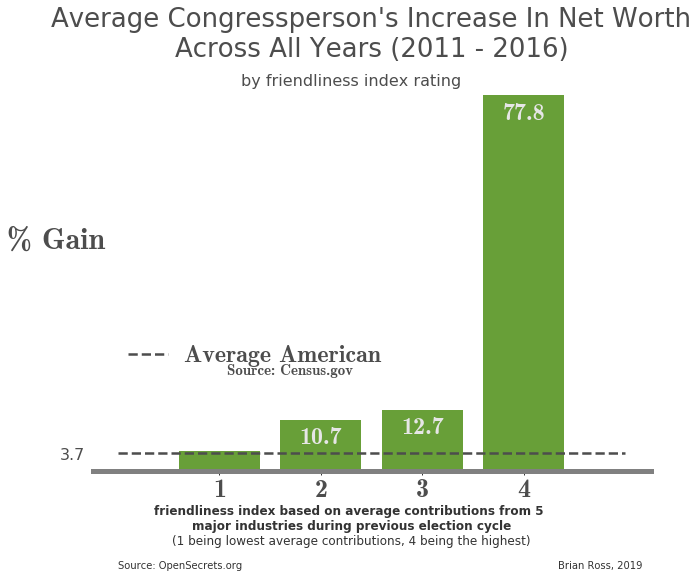

In [65]:
fig, ax = plt.subplots(figsize=(10,8))

# Font
csfont = {'fontname':'cmb10'}

# Background colors
fig.patch.set(facecolor="none")
ax.set(facecolor="none")

# Title
ax.set_title("Average Congressperson's Increase In Net Worth\nAcross All Years (2011 - 2016)",
          fontsize=26,
          pad=-20,
          ha='center',
          color='.3')

# Subtitle
ax.text(s="by friendliness index rating",
        fontsize=16,
        x=1.3,
        y=80,
        color='.3',
        ha='center')

# Bars
plt.bar(mom_labels,
        mean_of_means, 
        align='center',
        color='#689F38')

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        y_pos = y_value - 7
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_pos),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,
            fontsize=24,
            color='.9',
            **csfont)
                              
add_value_labels(ax)

############ X Axis ############

plt.xticks(mom_labels, mom_labels,   
           rotation='0',
           fontsize=26,
           fontweight='bold',
           color='.3',
           **csfont)

############ Y Axis ############

plt.ylabel("% Gain", 
           fontsize=30,
           color='.3',
           rotation='horizontal',
           **csfont)

ax.set_yticks([3.7])

ax.tick_params(axis="y", 
               labelsize=16,
               color='none',
               labelcolor='.3')

plt.ylim(0, 90)

############ Hline ############

plt.hlines(y=3.7,
           xmin=-1,
           xmax=4, 
           linestyle="--",
           linewidth=2.5,
           color='.3',
           label="Average American")

############ Legend ############

ax.legend('hline')

legend = plt.legend(bbox_to_anchor=(0.55,.2),
                    facecolor='none',  
                    prop={'size':20},
                    framealpha=0.0)

plt.setp(legend.get_texts(),    
         fontsize=24, 
         color='.3',
         **csfont)

ax.text(s="Source: Census.gov",
        fontsize=15,
        x=0.7,
        y=20,
        color='.3',
        ha='center',
        **csfont)


ax.grid(False) # Hide Grid

############ Spine Settings ############

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('.5')
ax.spines['bottom'].set_linewidth('5')                                                                                                                                                                                                                                                                       

############ Signature ############
ax.text(s="friendliness index based on average contributions from 5 \nmajor industries during previous election cycle",
        fontsize=12,
        fontweight='bold',
        x=1.3,
        y=-12,
        color='.2',
        ha='center')

ax.text(s="(1 being lowest average contributions, 4 being the highest)",
        fontsize=12,
        x=1.3,
        y=-15,
        color='.2',
        ha='center')

ax.text(s="Brian Ross, 2019",
        fontsize=10,
        x=3.75,
        y=-20,
        color='.2',
        ha='center',)

ax.text(s="Source: OpenSecrets.org",
        fontsize=10,
        x=-1,
        y=-20,
        color='.2',
        ha='left',)


plt.show();
